#머신러닝 분류 모델 구현

##문제정의와 데이터준비

###문제정의

아이리스(붓꽃) 데이터셋으로 아이리스 꽃을 3종류로 분류하는 머신러닝 모델을 구현

###데이터 준비

- 아이리스(붓꽃) 관찰데이터 셋 csv파일 수집
- 판다스 라이브러리로 데이터 불러오기
- 데이터 변수(열) 살펴보기


In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv('./iris_data.csv', engine='python')
print(iris.columns)
print(iris.head(5))
print(iris.tail(5))

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'stem_length', 'longitude', 'latitude', 'leaves_count', 'label'],
      dtype='object')
   sepal_length  sepal_width  petal_length  petal_width  stem_length  \
0           5.1          3.5           1.4          0.2           58   
1           4.9          3.0           1.4          0.2           56   
2           4.7          3.2           1.3          0.2           60   
3           4.6          3.1           1.5          0.2           59   
4           5.0          3.6           1.4          0.2           59   

   longitude  latitude  leaves_count   label  
0         82        13             6  setosa  
1          9         5             6  setosa  
2         27        35             6  setosa  
3          8        41             4  setosa  
4         13        30             6  setosa  
     sepal_length  sepal_width  petal_length  petal_width  stem_length  \
145           6.7          3.0           5.2   

##데이터 탐색

###데이터 정보 확인

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   stem_length   150 non-null    int64  
 5   longitude     150 non-null    int64  
 6   latitude      150 non-null    int64  
 7   leaves_count  150 non-null    int64  
 8   label         150 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 10.7+ KB


###데이터 열 정렬

In [4]:
iris = iris.sort_index(axis=1)
iris

,label,latitude,leaves_count,longitude,petal_length,petal_width,sepal_length,sepal_width,stem_length
0,setosa,13,6,82,1.4,0.2,5.1,3.5,58
1,setosa,5,6,9,1.4,0.2,4.9,3.0,56
2,setosa,35,6,27,1.3,0.2,4.7,3.2,60
3,setosa,41,4,8,1.5,0.2,4.6,3.1,59
4,setosa,30,6,13,1.4,0.2,5.0,3.6,59
...,...,...,...,...,...,...,...,...,...
145,virginica,26,5,20,5.2,2.3,6.7,3.0,60
146,virginica,30,6,59,5.0,1.9,6.3,2.5,59
147,virginica,3,5,76,5.2,2.0,6.5,3.0,61
148,virginica,24,6,78,5.4,2.3,6.2,3.4,61


###데이터 결측치 확인

In [5]:
iris.isnull().count()

label           150
latitude        150
leaves_count    150
longitude       150
petal_length    150
petal_width     150
sepal_length    150
sepal_width     150
stem_length     150
dtype: int64

###변수들의 상관관계 확인

- 상관계수

In [6]:
iris_f = iris.corr(method='pearson')
print(iris_f)

              latitude  leaves_count  longitude  petal_length  petal_width  \
latitude      1.000000     -0.038138  -0.031819     -0.066886    -0.045803   
leaves_count -0.038138      1.000000   0.135838      0.078974     0.064074   
longitude    -0.031819      0.135838   1.000000      0.048858     0.043379   
petal_length -0.066886      0.078974   0.048858      1.000000     0.962757   
petal_width  -0.045803      0.064074   0.043379      0.962757     1.000000   
sepal_length -0.050195      0.053148   0.002363      0.871754     0.817954   
sepal_width  -0.033566      0.072569  -0.010228     -0.420516    -0.356544   
stem_length   0.005246      0.027646  -0.055362      0.113745     0.122129   

              sepal_length  sepal_width  stem_length  
latitude         -0.050195    -0.033566     0.005246  
leaves_count      0.053148     0.072569     0.027646  
longitude         0.002363    -0.010228    -0.055362  
petal_length      0.871754    -0.420516     0.113745  
petal_width       0.81

- 상관관계의 시각화

In [7]:
#시각화를 위한 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

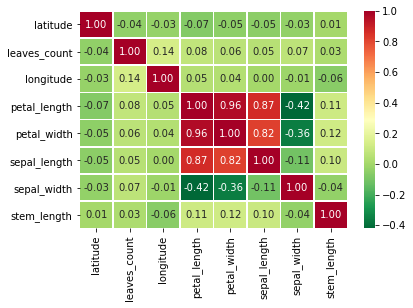

In [8]:
sns.heatmap(data=iris_f, annot=True, fmt='.2f', linewidth=.5, cmap='RdYlGn_r')
plt.show()

- 상관계수 값이 0.5미만인 변수를 제거

In [9]:
#'latitude', 'longitude', 'leaves_count', 'stem_length' 열 제거
irisdata = iris.drop(['latitude', 'longitude', 'leaves_count', 'stem_length'], axis=1)
print(irisdata)

         label  petal_length  petal_width  sepal_length  sepal_width
0       setosa           1.4          0.2           5.1          3.5
1       setosa           1.4          0.2           4.9          3.0
2       setosa           1.3          0.2           4.7          3.2
3       setosa           1.5          0.2           4.6          3.1
4       setosa           1.4          0.2           5.0          3.6
..         ...           ...          ...           ...          ...
145  virginica           5.2          2.3           6.7          3.0
146  virginica           5.0          1.9           6.3          2.5
147  virginica           5.2          2.0           6.5          3.0
148  virginica           5.4          2.3           6.2          3.4
149  virginica           5.1          1.8           5.9          3.0

[150 rows x 5 columns]


- 설명변수로 아이리스를 분류 가능한지 그래프로 확인

<Figure size 576x576 with 0 Axes>

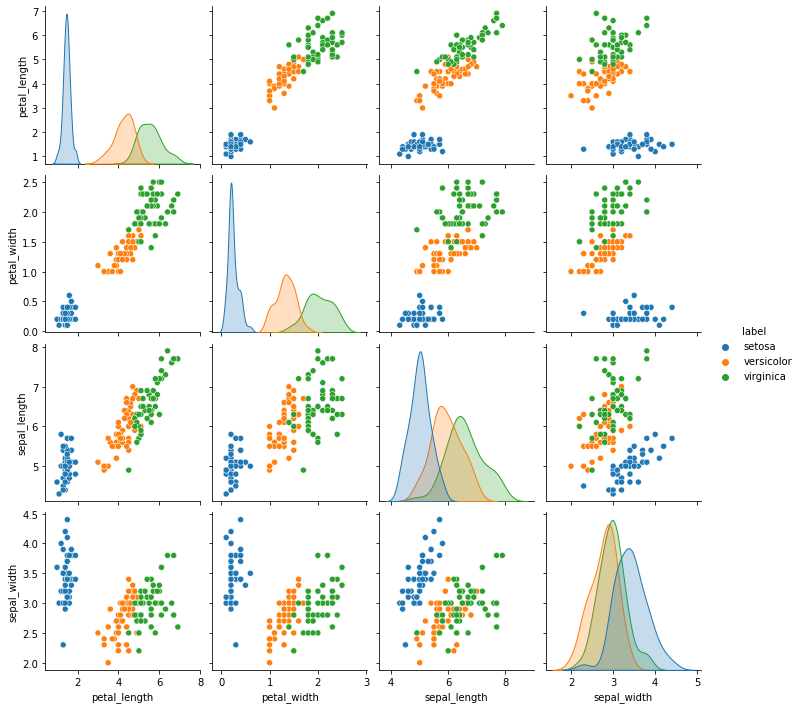

In [10]:
plt.figure(figsize=(8, 8))
sns.pairplot(data=irisdata, vars=['petal_length', 'petal_width', 'sepal_length', 'sepal_width'], hue='label')
plt.show()

###변수의 데이터형식 변환

In [11]:
#'label'변수의 열 값 확인
irisdata['label'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
#'label'변수의 문자열 형식을 숫자로 대체
irisdata = irisdata.replace('setosa', 0)
irisdata = irisdata.replace('versicolor', 1)
irisdata = irisdata.replace('virginica', 2)
irisdata['label'].unique()

array([0, 1, 2], dtype=int64)

###레이블 변수 분리

In [13]:
#결과변수(종속변수)와 설명변수(독립변수)의 구분
target = irisdata['label']
data = irisdata[irisdata.columns.difference(['label'])]  #iris['label']열 제외
print(target)
print(data)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int64
     petal_length  petal_width  sepal_length  sepal_width
0             1.4          0.2           5.1          3.5
1             1.4          0.2           4.9          3.0
2             1.3          0.2           4.7          3.2
3             1.5          0.2           4.6          3.1
4             1.4          0.2           5.0          3.6
..            ...          ...           ...          ...
145           5.2          2.3           6.7          3.0
146           5.0          1.9           6.3          2.5
147           5.2          2.0           6.5          3.0
148           5.4          2.3           6.2          3.4
149           5.1          1.8           5.9          3.0

[150 rows x 4 columns]


##머신러닝 분류 모델 구현

###머신러닝 라이브러리

In [14]:
#훈련데이터와 평가데이터분리 라이브러리
from sklearn.model_selection import train_test_split

In [15]:
#머신러닝 분류 모델 알고리즘 라이브러리
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [16]:
#모델 정확도 라이브러리
from sklearn.metrics import accuracy_score
#모델 혼동행렬 라이브러리
from sklearn.metrics import confusion_matrix, classification_report

###학습데이터와 평가데이터 분리

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True)

###Decision Tree(결정나무) 분류 알고리즘 모델

In [18]:
treemodel = tree.DecisionTreeClassifier()
treemodel.fit(X_train, y_train)
p1_test = treemodel.predict(X_test)

- 결정나무 알고리즘의 시각화

In [19]:
#!pip install graphviz

In [20]:
#!conda install graphviz

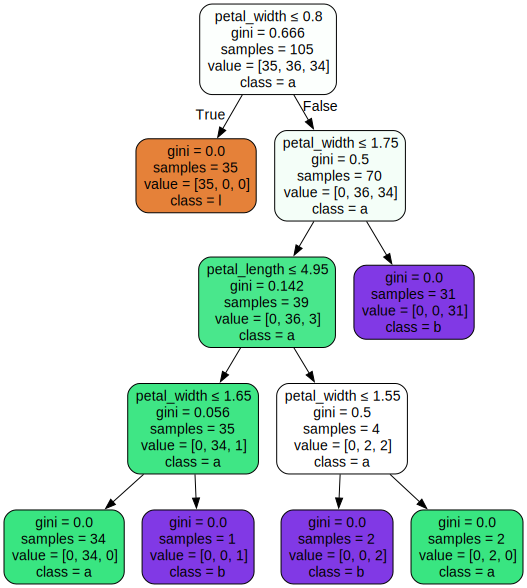

In [21]:
import graphviz
dot_data = tree.export_graphviz(treemodel, out_file=None,
                                filled=True, rounded=True,
                                special_characters=True,
                                feature_names=data.columns,
                                class_names=target.name)
graph = graphviz.Source(dot_data)
graph

- 결정나무 알고리즘 분류 모델 정확도

In [22]:
print('정확도: ', accuracy_score(y_test, p1_test))

정확도:  0.9555555555555556


- 결정나무 알고리즘 분류 모델 혼동행렬

In [23]:
classNames = iris['label'].unique()
print(classNames)

['setosa' 'versicolor' 'virginica']


<AxesSubplot:>

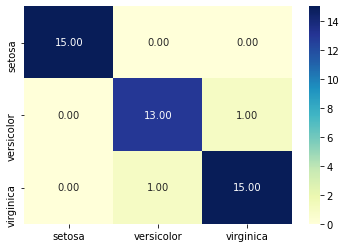

In [24]:
cm = confusion_matrix(y_test, p1_test)
df_cm = pd.DataFrame(cm, index=[i for i in classNames], columns=[i for i in classNames])
sns.heatmap(data=df_cm, annot=True, fmt='.2f', cmap='YlGnBu')

In [25]:
print(classification_report(y_test, p1_test, target_names=classNames))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        14
   virginica       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



###k-NN(최근접이웃탐색) 알고리즘 분류 모델

In [26]:
neighmodel = KNeighborsClassifier(n_neighbors=3)
neighmodel.fit(X_train, y_train)
p2_test = neighmodel.predict(X_test)

- k-NN 알고리즘 분류 모델 정확도

In [27]:
print('정확도: ', accuracy_score(y_test, p2_test))

정확도:  0.9777777777777777


- k-NN 알고리즘 분류 모델 혼동행렬

<AxesSubplot:>

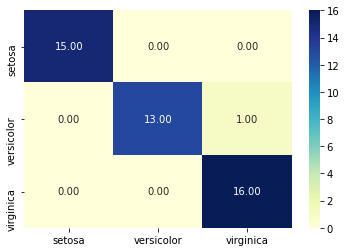

In [28]:
cm = confusion_matrix(y_test, p2_test)
df_cm = pd.DataFrame(cm, index=[i for i in classNames], columns=[i for i in classNames])
sns.heatmap(data=df_cm, annot=True, fmt='.2f', cmap='YlGnBu')

In [29]:
print(classification_report(y_test, p2_test, target_names=classNames))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.96        14
   virginica       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



###SVM(서포트 벡터 머신) 알고리즘 분류 모델

In [30]:
svmmodel = svm.SVC(gamma=0.001, C=100.)
svmmodel.fit(X_train, y_train)
p3_test = svmmodel.predict(X_test)

- SVM 분류 모델 정확도

In [31]:
print('정확도: ', accuracy_score(y_test, p3_test))

정확도:  0.9777777777777777


- SVM 분류 모델 혼동행렬

<AxesSubplot:>

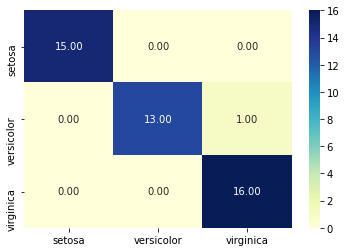

In [32]:
cm = confusion_matrix(y_test, p3_test)
df_cm = pd.DataFrame(cm, index=[i for i in classNames], columns=[i for i in classNames])
sns.heatmap(data=df_cm, annot=True, fmt='.2f', cmap='YlGnBu')

In [33]:
print(classification_report(y_test, p3_test, target_names=classNames))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.96        14
   virginica       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

